<img src="https://github.com/Rajeev-Mishraa/Flipkart_Data_Analysis_And_Web_Scrapping_Project/blob/main/banner_image.jpg?raw=true" alt="Alt Text" style="height:250px; width:1000px;"/>


# Exploring Laptop Options Under ₹60,000: A Data Science Approach


## 1. Web Scrapping

### Scrap data from Flipkart

In [1]:
import requests
import bs4
from bs4 import BeautifulSoup

url = 'https://www.flipkart.com/search?q=laptop+under+50000+gaming&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_19_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_19_na_na_ps&as-pos=1&as-type=HISTORY&suggestionId=laptop+under+50000+gaming%7CLaptops&requestId=103be4ab-f7c2-491d-ac0d-83d942e42d89'

# Used headers since there was some internal server error
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.5481.78 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.5',
    'Referer': 'https://www.google.com',
    'Accept-Encoding': 'gzip, deflate, br',
    'DNT': '1',  # Do Not Track Request Header
    'Connection': 'keep-alive'
}
res = requests.get(url, headers=headers)

print(res)


<Response [200]>


In [2]:
soup = BeautifulSoup(res.text, "html.parser")

#Extracing first page link
page_link = soup.find('a', class_= 'cn++Ap A1msZJ').get('href')
page_link        

'/search?q=laptop+under+50000+gaming&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_19_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_19_na_na_ps&as-pos=1&as-type=HISTORY&suggestionId=laptop+under+50000+gaming%7CLaptops&requestId=103be4ab-f7c2-491d-ac0d-83d942e42d89&page=1'

In [3]:
domain = 'https://www.flipkart.com'

first_page_url = domain + page_link
print(first_page_url)

https://www.flipkart.com/search?q=laptop+under+50000+gaming&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_19_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_19_na_na_ps&as-pos=1&as-type=HISTORY&suggestionId=laptop+under+50000+gaming%7CLaptops&requestId=103be4ab-f7c2-491d-ac0d-83d942e42d89&page=1


### Extracing Product Information from All 24 Pages

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

link = 'https://www.flipkart.com/search?q=laptop+under+50000+gaming&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_19_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_19_na_na_ps&as-pos=1&as-type=HISTORY&suggestionId=laptop+under+50000+gaming%7CLaptops&requestId=103be4ab-f7c2-491d-ac0d-83d942e42d89&page='

prod_data = []

for i in range(1, 24):  # Loop from 1 to 24 to cover all 24 pages
    url = link + str(i)
    # Used headers since there was some internal server error
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.5481.78 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.5',
        'Referer': 'https://www.google.com',
        'Accept-Encoding': 'gzip, deflate, br',
        'DNT': '1',  # Do Not Track Request Header
        'Connection': 'keep-alive'
    }
    html_data = requests.get(url, headers=headers).text
    
    soup = BeautifulSoup(html_data, 'html.parser')
    prod_info = soup.findAll('div', class_='yKfJKb row')

    for product in prod_info:
        prod_name = product.find('div', class_='KzDlHZ').text.split("-")[0].strip().replace(',', '')
        prod_price = product.find('div', class_='Nx9bqj _4b5DiR').text.strip().replace('₹', '').replace(',', '')
        mrp = product.find('div', class_='yRaY8j ZYYwLA')
        try:
            prod_mrp = mrp.text.strip().replace('₹', '').replace(',', '')
        except:
            prod_mrp = 0
        star = product.find('div', class_='XQDdHH')
        try:
            prod_star = star.text.strip()
        except:
            prod_star = 0
        rating = product.find('span', class_="Wphh3N")
        try:
            prod_rating = rating.text.split("&")[0].replace('Ratings', '').replace(',', '')
        except:
            prod_rating = 0
        review = product.find('span', class_="Wphh3N")
        try:
            prod_review = review.text.split("&")[1].replace('Reviews', '').replace(',', '')
        except:
            prod_review = 0
        prod_processor = product.find_all('li', class_ = "J+igdf")[0].text
        prod_RAM = product.find_all('li', class_ = "J+igdf")[1].text
        prod_storage = product.find_all('li', class_ = "J+igdf")[3].text
        
        prod_data.append({"Product Name": prod_name, "Product Price": prod_price, "Product MRP": prod_mrp,
                          "Product Star": prod_star, "Product Ratings": prod_rating,
                          "Product Reviews": prod_review, "Product Processor": prod_processor, 
                     "Product RAM": prod_RAM, "Product Storage": prod_storage})

df = pd.DataFrame(prod_data)
df.head()

,Product Name,Product Price,Product MRP,Product Star,Product Ratings,Product Reviews,Product Processor,Product RAM,Product Storage
0,ASUS Vivobook Pro 15 For Creator AMD Ryzen 5 H...,48990,76990,4.4,1331,138,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD
1,HP Victus gaming AMD Ryzen 5 Hexa Core 5600H,47990,63628,4.3,1185,100,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD
2,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,45990,71290,4.2,563,50,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD
3,Lenovo AMD Ryzen 5 Quad Core R5,45490,77990,4.2,180,20,AMD Ryzen 5 Quad Core Processor,8 GB DDR4 RAM,512 GB SSD
4,Lenovo IdeaPad Gaming 3 AMD Ryzen 5 Quad Core ...,45990,77990,4.2,180,20,AMD Ryzen 5 Quad Core Processor,8 GB DDR4 RAM,512 GB SSD


In [6]:
#Save the file in csv format
df.to_csv('best_affordable_laptops.csv', index = False)

# Data Analysis & Visualization

*1.Data Processing*

*2.Expolatory Data Analysis & Visualization*

In [7]:
# Imported important Libraries for data analysis and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [8]:
# Read the csv file data

dff = pd.read_csv('best_affordable_laptops.csv')
dff.head()

,Product Name,Product Price,Product MRP,Product Star,Product Ratings,Product Reviews,Product Processor,Product RAM,Product Storage
0,HP Victus gaming AMD Ryzen 5 Hexa Core 5600H,47990,63628,4.2,1181,99,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD
1,ASUS Vivobook Pro 15 For Creator AMD Ryzen 5 H...,49990,76990,4.4,1330,138,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD
2,Lenovo Ideapad Intel Core i5 11th Gen 11320H,49990,90890,0.0,0,0,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,512 GB SSD
3,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,47399,71290,4.1,560,50,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD
4,Lenovo IdeaPad Gaming 3 AMD Ryzen 5 Quad Core ...,49990,77990,4.2,179,20,AMD Ryzen 5 Quad Core Processor,8 GB DDR4 RAM,512 GB SSD


## 1. Data Processing

In [9]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product Name       552 non-null    object 
 1   Product Price      552 non-null    int64  
 2   Product MRP        552 non-null    int64  
 3   Product Star       552 non-null    float64
 4   Product Ratings    552 non-null    object 
 5   Product Reviews    552 non-null    object 
 6   Product Processor  552 non-null    object 
 7   Product RAM        552 non-null    object 
 8   Product Storage    552 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 38.9+ KB


*As the data types of Ratings and Reviews showing incorrect so change the data types of columns*

In [10]:
# Change the data types

dff['Product Ratings'] = dff['Product Ratings'].astype(int)
dff['Product Reviews'] = dff['Product Reviews'].astype(int)

In [11]:
# Corrected data type:

dff.dtypes

Product Name          object
Product Price          int64
Product MRP            int64
Product Star         float64
Product Ratings        int32
Product Reviews        int32
Product Processor     object
Product RAM           object
Product Storage       object
dtype: object

### Check if there is any null values in dataset

In [12]:
dff.isnull().sum()

Product Name         0
Product Price        0
Product MRP          0
Product Star         0
Product Ratings      0
Product Reviews      0
Product Processor    0
Product RAM          0
Product Storage      0
dtype: int64

*As we checked there is no Null Values found and if there is any null values 
then we can replace with assigning values or drop null values*

### Check for duplicate records and if found then drop dulplicate records

In [13]:
len(dff[dff.duplicated()])

113

In [14]:
dff.shape

(552, 9)

In [15]:
dff = dff.drop_duplicates()

In [16]:
dff.shape

(439, 9)

In [17]:
dff[dff.duplicated()]

,Product Name,Product Price,Product MRP,Product Star,Product Ratings,Product Reviews,Product Processor,Product RAM,Product Storage


*Now the data has no duplicate records*

###  Remove rows where 'Product Processor' is 'Free upgrade to Windows 11 when available'

In [18]:
dff = dff[dff['Product Processor'] != 'Free upgrade to Windows 11 when available']

In [19]:
# Filter rows where 'Product Processor' contains 'Free upgrade to Windows 11 when available'
dff[dff['Product Processor'].str.contains('Free upgrade to Windows 11 when available')]


,Product Name,Product Price,Product MRP,Product Star,Product Ratings,Product Reviews,Product Processor,Product RAM,Product Storage


*Now the data has no records where Product Processor is showing Free upgrate to Window 11*

## 2. Exploratory Data Analysis

### Q.1:- What is the distribution of laptop prices under ₹60,000?

In [20]:
laptop_under_60k = dff[dff['Product Price']<60000]
laptop_under_60k

,Product Name,Product Price,Product MRP,Product Star,Product Ratings,Product Reviews,Product Processor,Product RAM,Product Storage
0,HP Victus gaming AMD Ryzen 5 Hexa Core 5600H,47990,63628,4.2,1181,99,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD
1,ASUS Vivobook Pro 15 For Creator AMD Ryzen 5 H...,49990,76990,4.4,1330,138,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD
2,Lenovo Ideapad Intel Core i5 11th Gen 11320H,49990,90890,0.0,0,0,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,512 GB SSD
3,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,47399,71290,4.1,560,50,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD
4,Lenovo IdeaPad Gaming 3 AMD Ryzen 5 Quad Core ...,49990,77990,4.2,179,20,AMD Ryzen 5 Quad Core Processor,8 GB DDR4 RAM,512 GB SSD
...,...,...,...,...,...,...,...,...,...
430,HP HP Pavilion AMD Ryzen 5 Hexa Core AMD R5,57750,76020,4.4,2605,241,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD
435,ASUS TUF Gaming F15 Intel Core i5 10th Gen 10300H,52121,77990,4.3,586,55,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD
441,HP Victus Intel Core i5 12th Gen 12450H,53500,79999,4.1,31,4,Intel Core i5 Processor (12th Gen),8 GB DDR4 RAM,512 GB SSD
446,ASUS TUF Gaming F17,57990,85990,0.0,0,0,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,512 GB SSD


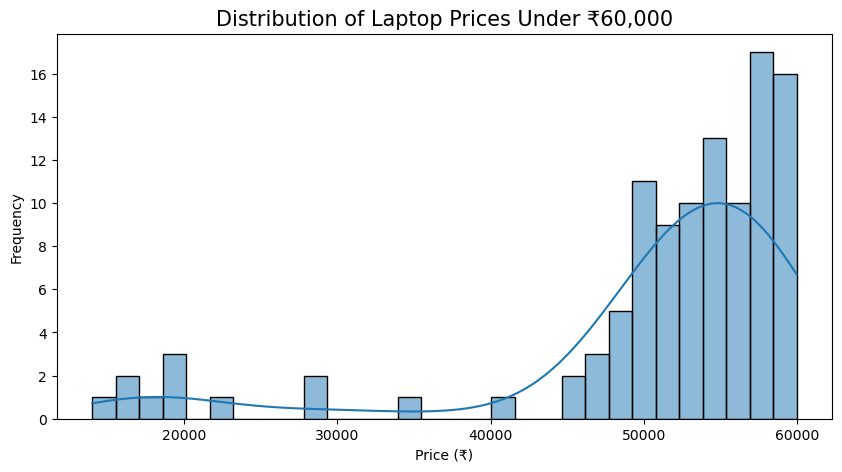

In [21]:
## Plot the histograph

plt.figure(figsize =(10,5))
sns.histplot(laptop_under_60k['Product Price'], bins = 30, kde = True)
plt.title('Distribution of Laptop Prices Under ₹60,000', fontsize = 15)
plt.xlabel('Price (₹)')
plt.ylabel('Frequency')
plt.show()

### Q.2:- Which Laptop has the highest ratings?

In [22]:
dff[dff['Product Ratings'] == max(dff['Product Ratings'])]

,Product Name,Product Price,Product MRP,Product Star,Product Ratings,Product Reviews,Product Processor,Product RAM,Product Storage
374,Acer Aspire 7 Intel Core i5 9th Gen 9300H,55490,79999,4.5,13826,2090,Intel Core i5 Processor (9th Gen),8 GB DDR4 RAM,512 GB SSD


### Q.3:- Find out Top 5 Laptops with higest ratings

In [23]:
top_5_rated_laptops = dff.sort_values(by = 'Product Ratings', ascending = False).head(5)
top_5_rated_laptops

,Product Name,Product Price,Product MRP,Product Star,Product Ratings,Product Reviews,Product Processor,Product RAM,Product Storage
374,Acer Aspire 7 Intel Core i5 9th Gen 9300H,55490,79999,4.5,13826,2090,Intel Core i5 Processor (9th Gen),8 GB DDR4 RAM,512 GB SSD
88,HP Pavilion AMD Ryzen 5 Hexa Core AMD R5,56990,70600,4.4,13419,1329,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD
141,ASUS TUF Gaming F15 (2024) Intel Core i5 10th ...,52000,70990,4.4,7012,668,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD
17,Acer Aspire 7 AMD Ryzen 5 Hexa Core 5500U,48916,87593,4.4,6520,765,AMD Ryzen 5 Hexa Core Processor,16 GB DDR4 RAM,512 GB SSD
16,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,49990,85000,4.3,5206,474,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD


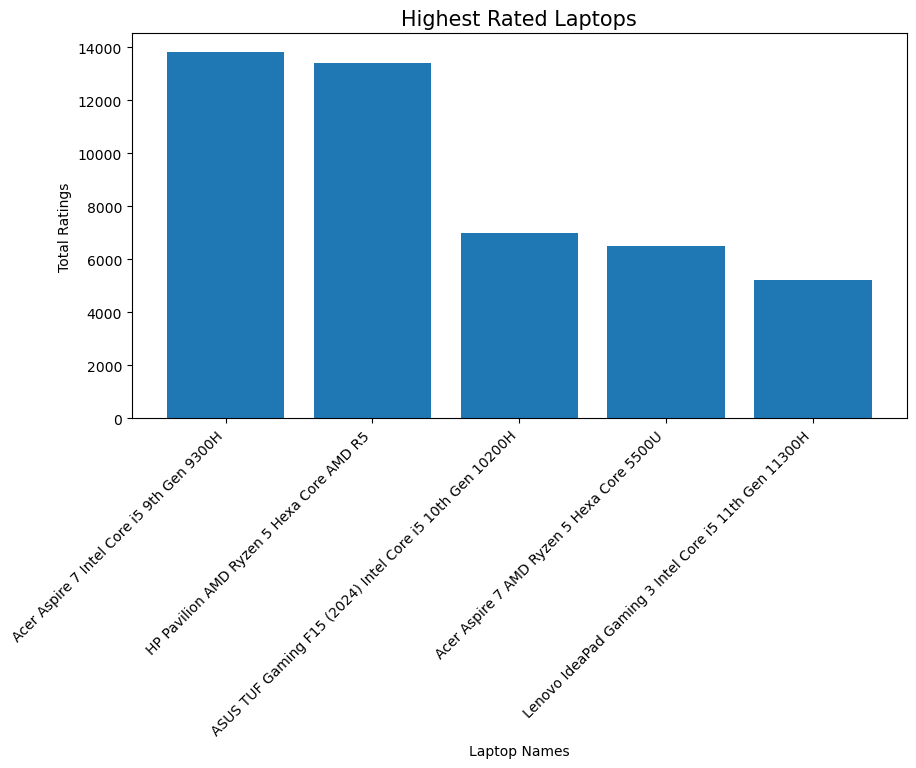

In [24]:
plt.figure(figsize = (10,5))
plt.bar(x = top_5_rated_laptops['Product Name'], height = top_5_rated_laptops['Product Ratings'])
plt.title('Highest Rated Laptops', fontsize = 15)
plt.xlabel('Laptop Names', fontsize = 10)
plt.ylabel('Total Ratings', fontsize = 10)
plt.xticks(rotation=45, ha='right')
plt.show()


### Q.4:- Create a scatter plot to visualize the relationship between price and reviews.

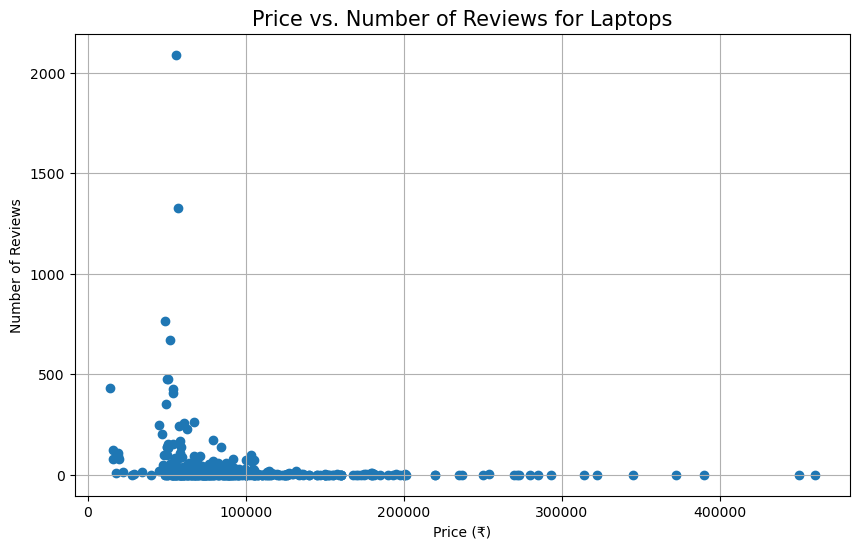

In [25]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x = dff['Product Price'], y = dff['Product Reviews'])
plt.title('Price vs. Number of Reviews for Laptops', fontsize = 15)
plt.xlabel('Price (₹)')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

*Graph shows the number of reviews are decreasing as the price of the laptop increases*

### Q.5 What are the most common processors in the laptops under ₹60,000?

In [26]:
processor_counts = laptop_under_60k['Product Processor'].value_counts()
processor_counts

Intel Core i5 Processor (11th Gen)            28
AMD Ryzen 5 Hexa Core Processor               25
Intel Core i5 Processor (12th Gen)            18
Intel Core i5 Processor (10th Gen)             7
Intel Celeron Dual Core Processor              6
AMD Ryzen 5 Quad Core Processor                5
Intel Core i7 Processor (11th Gen)             2
Intel Core i5 Processor (13th Gen)             2
AMD Ryzen 5 Hexa Core Processor (5th Gen)      2
Intel Core i5 Processor (9th Gen)              2
AMD Ryzen 5 Dual Core Processor (5th Gen)      1
MediaTek Kompanio 520 Processor                1
Intel Core i3 Processor (13th Gen)             1
Intel Celeron Quad Core Processor              1
AMD Ryzen 5 Processor                          1
AMD Ryzen 5 Dual Core Processor (10th Gen)     1
AMD Ryzen Z1 Octa Core Processor               1
AMD Ryzen 7 Octa Core Processor                1
MediaTek MT8183 Processor                      1
AMD Ryzen 3 Quad Core Processor                1
AMD Ryzen 5 Hexa Cor

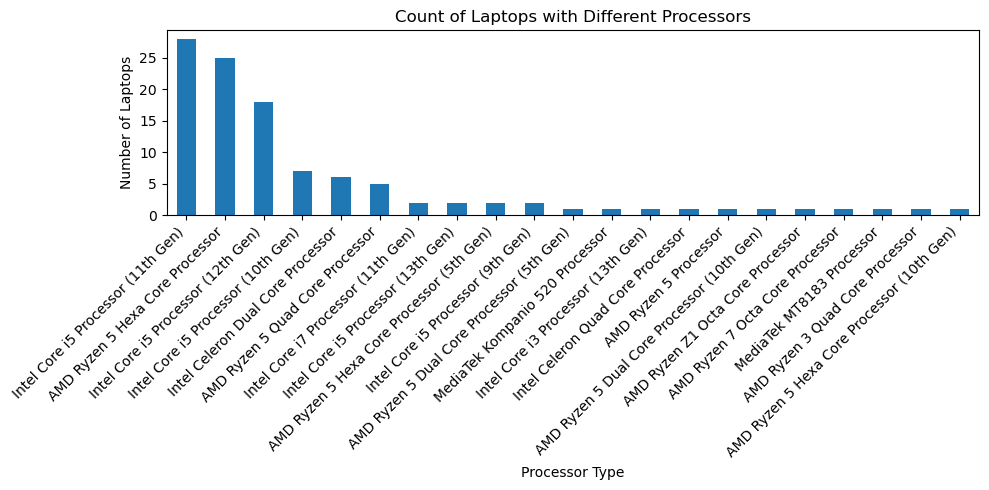

In [27]:
# Create a bar chart

plt.figure(figsize=(10, 5))
processor_counts.plot(kind = 'bar')
plt.xlabel('Processor Type')
plt.ylabel('Number of Laptops')
plt.title('Count of Laptops with Different Processors')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Search Laptop based on specifications

In [28]:
ram = input('RAM needs to be : ')
storage = input('Storage needs to be : ' )
processor = input('Processor needs to be : ')

print('\n')
print('Here is the list of laptops as per specification:')

dff[(dff['Product RAM'] == ram) & (dff['Product Storage'] == storage) & (dff['Product Processor'] == processor)]

RAM needs to be : 8 GB DDR4 RAM
Storage needs to be : 512 GB SSD
Processor needs to be : Intel Core i5 Processor (10th Gen)


Here is the list of laptops as per specification:


,Product Name,Product Price,Product MRP,Product Star,Product Ratings,Product Reviews,Product Processor,Product RAM,Product Storage
141,ASUS TUF Gaming F15 (2024) Intel Core i5 10th ...,52000,70990,4.4,7012,668,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD
418,ASUS TUF Gaming F15 Intel Core i5 10th Gen 10300H,54000,89990,4.4,4393,428,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD
428,ASUS TUF Gaming F15 Intel Core i5 10th Gen 10300H,53750,77990,4.1,43,3,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD
435,ASUS TUF Gaming F15 Intel Core i5 10th Gen 10300H,52121,77990,4.3,586,55,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD
453,ASUS TUF Gaming F17 Intel Core i5 10th Gen 10300H,73990,79770,4.8,12,0,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD
500,ASUS TUF Gaming F17 Intel Core i5 10th Gen 10300H,71500,79800,0.0,0,0,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD
